# <span style="color: #b0f542">Task 1: COVID-19 Risk Classification </span>

### **Objective**
Predict whether an individual is likely to contract COVID-19 using the provided dataset.

### **Requirements**
- Use **Random Forest Classifier** and **Gradient Boosted Classifier** to build predictive models.
- Evaluate the models and provide **comparative insights** into their performance.
- Analyze **feature importance** and discuss the **practical implications** of the models.


In [2]:
import pandas as pd

In [3]:
covid_ds = pd.read_csv(filepath_or_buffer="datasets/coronavirusdataset.csv")

In [4]:
covid_ds.head(5)

,batch_date,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,...,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat,cxr_findings,cxr_impression,cxr_label,cxr_link
0,2020-10-20,"SARS-CoV-2, NAA",Nasal,Negative,39,False,NaN,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
1,2020-10-20,COVID-19 PCR External Result,Nasal,Negative,56,False,NaN,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
2,2020-10-20,Rapid COVID-19 PCR Test,Nasal,Negative,35,False,NaN,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
3,2020-10-20,Rapid COVID-19 PCR Test,Nasal,Negative,37,False,NaN,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
4,2020-10-20,Rapid COVID-19 PCR Test,Nasal,Negative,42,False,NaN,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN


In [5]:
covid_ds

,batch_date,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,...,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat,cxr_findings,cxr_impression,cxr_label,cxr_link
0,2020-10-20,"SARS-CoV-2, NAA",Nasal,Negative,39,False,NaN,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
1,2020-10-20,COVID-19 PCR External Result,Nasal,Negative,56,False,NaN,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
2,2020-10-20,Rapid COVID-19 PCR Test,Nasal,Negative,35,False,NaN,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
3,2020-10-20,Rapid COVID-19 PCR Test,Nasal,Negative,37,False,NaN,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
4,2020-10-20,Rapid COVID-19 PCR Test,Nasal,Negative,42,False,NaN,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7289,2020-10-20,COVID-19 PCR External Result,Nasal,Negative,26,False,NaN,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
7290,2020-10-20,"SARS-CoV-2, NAA",Nasal,Negative,29,False,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
7291,2020-10-20,"SARS-CoV-2, NAA",Nasal,Negative,33,False,NaN,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
7292,2020-10-20,Rapid COVID-19 PCR Test,Nasal,Negative,46,False,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN


In [6]:
covid_ds.columns

Index(['batch_date', 'test_name', 'swab_type', 'covid19_test_results', 'age',
       'high_risk_exposure_occupation', 'high_risk_interactions', 'diabetes',
       'chd', 'htn', 'cancer', 'asthma', 'copd', 'autoimmune_dis', 'smoker',
       'temperature', 'pulse', 'sys', 'dia', 'rr', 'sats', 'rapid_flu_results',
       'rapid_strep_results', 'ctab', 'labored_respiration', 'rhonchi',
       'wheezes', 'days_since_symptom_onset', 'cough', 'cough_severity',
       'fever', 'sob', 'sob_severity', 'diarrhea', 'fatigue', 'headache',
       'loss_of_smell', 'loss_of_taste', 'runny_nose', 'muscle_sore',
       'sore_throat', 'cxr_findings', 'cxr_impression', 'cxr_label',
       'cxr_link'],
      dtype='object')

## <span style="color:#b0f542">1.1 Feature Engineering</span>
Removing the batch date column since each datapoint is 2020-10-20

In [7]:
covid_ds = covid_ds.drop('batch_date', axis=1)

In [8]:
covid_ds.tail(4)

,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,cancer,...,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat,cxr_findings,cxr_impression,cxr_label,cxr_link
7290,"SARS-CoV-2, NAA",Nasal,Negative,29,False,False,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
7291,"SARS-CoV-2, NAA",Nasal,Negative,33,False,NaN,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
7292,Rapid COVID-19 PCR Test,Nasal,Negative,46,False,False,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
7293,Rapid COVID-19 PCR Test,Nasal,Negative,53,False,NaN,False,False,True,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN


imputing the high_risk_exposure_occupation missing values with the modal value i.e "False"

In [9]:
covid_ds['high_risk_exposure_occupation'] = covid_ds['high_risk_exposure_occupation'].apply(lambda x: False if pd.isna(x) else x)

In [10]:
covid_ds.sample(5)

,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,cancer,...,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat,cxr_findings,cxr_impression,cxr_label,cxr_link
2757,Rapid COVID-19 PCR Test,Nasal,Negative,38,False,NaN,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
6445,Rapid COVID-19 PCR Test,Nasal,Negative,28,False,NaN,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
5752,COVID-19 PCR External Result,Nasal,Negative,47,False,NaN,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
3724,"SARS-CoV-2, NAA",Nasal,Negative,38,False,True,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
6573,Rapid COVID-19 PCR Test,Nasal,Negative,37,False,NaN,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN


below we impute the columns 'sats',
    'temperature',
     missing values with their respective averages

In [11]:
cols = [
    'sats',
    'temperature',
]

for c in cols:
    covid_ds[c] = covid_ds[c].fillna(covid_ds[c].mean())


In [12]:
covid_ds.sample(5)

,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,cancer,...,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat,cxr_findings,cxr_impression,cxr_label,cxr_link
2679,Rapid COVID-19 PCR Test,Nasal,Negative,32,False,NaN,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
3110,Rapid COVID-19 PCR Test,Nasal,Negative,19,False,NaN,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
2475,"SARS-CoV-2, NAA",Nasal,Negative,43,False,NaN,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
3086,Rapid COVID-19 PCR Test,Nasal,Negative,35,False,NaN,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
6288,Rapid COVID-19 PCR Test,Nasal,Negative,35,False,NaN,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN


removing 'cough_severity',
    'sob_severity',
    'days_since_symptom_onset' columns due to too few data points despite their relative importance

In [13]:
covid_ds = covid_ds.drop(['cough_severity',
    'sob_severity',
    'days_since_symptom_onset'], axis=1)
covid_ds

,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,cancer,...,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat,cxr_findings,cxr_impression,cxr_label,cxr_link
0,"SARS-CoV-2, NAA",Nasal,Negative,39,False,NaN,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
1,COVID-19 PCR External Result,Nasal,Negative,56,False,NaN,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
2,Rapid COVID-19 PCR Test,Nasal,Negative,35,False,NaN,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
3,Rapid COVID-19 PCR Test,Nasal,Negative,37,False,NaN,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
4,Rapid COVID-19 PCR Test,Nasal,Negative,42,False,NaN,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7289,COVID-19 PCR External Result,Nasal,Negative,26,False,NaN,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
7290,"SARS-CoV-2, NAA",Nasal,Negative,29,False,False,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
7291,"SARS-CoV-2, NAA",Nasal,Negative,33,False,NaN,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
7292,Rapid COVID-19 PCR Test,Nasal,Negative,46,False,False,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN


In [14]:
covid_ds.columns

Index(['test_name', 'swab_type', 'covid19_test_results', 'age',
       'high_risk_exposure_occupation', 'high_risk_interactions', 'diabetes',
       'chd', 'htn', 'cancer', 'asthma', 'copd', 'autoimmune_dis', 'smoker',
       'temperature', 'pulse', 'sys', 'dia', 'rr', 'sats', 'rapid_flu_results',
       'rapid_strep_results', 'ctab', 'labored_respiration', 'rhonchi',
       'wheezes', 'cough', 'fever', 'sob', 'diarrhea', 'fatigue', 'headache',
       'loss_of_smell', 'loss_of_taste', 'runny_nose', 'muscle_sore',
       'sore_throat', 'cxr_findings', 'cxr_impression', 'cxr_label',
       'cxr_link'],
      dtype='object')

removing the following columns due to too few datapoints relative to their importance in making a covid diagnosis:
'rapid_flu_results','rapid_strep_results', 'cxr_link''rapid_flu_results', 'rapid_strep_results', 'ctab', 'rr', 'sys', 'dia',  'cxr_findings', 'cxr_impression', 'cxr_label','wheezes'

In [15]:
covid_ds= covid_ds.drop(['rapid_flu_results','rapid_strep_results', 'cxr_link','rapid_flu_results', 'rapid_strep_results', 'ctab', 'rr', 'sys', 'dia',  'cxr_findings', 'cxr_impression', 'cxr_label','wheezes'], axis= 1)

In [16]:
covid_ds = covid_ds.drop(['rhonchi', 'labored_respiration'], axis=1)

In [17]:
covid_ds.columns

Index(['test_name', 'swab_type', 'covid19_test_results', 'age',
       'high_risk_exposure_occupation', 'high_risk_interactions', 'diabetes',
       'chd', 'htn', 'cancer', 'asthma', 'copd', 'autoimmune_dis', 'smoker',
       'temperature', 'pulse', 'sats', 'cough', 'fever', 'sob', 'diarrhea',
       'fatigue', 'headache', 'loss_of_smell', 'loss_of_taste', 'runny_nose',
       'muscle_sore', 'sore_throat'],
      dtype='object')

In [18]:
covid_ds

,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,cancer,...,fever,sob,diarrhea,fatigue,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat
0,"SARS-CoV-2, NAA",Nasal,Negative,39,False,NaN,False,False,False,False,...,NaN,False,False,False,False,False,False,False,False,False
1,COVID-19 PCR External Result,Nasal,Negative,56,False,NaN,False,False,False,False,...,NaN,False,False,False,False,False,False,False,False,False
2,Rapid COVID-19 PCR Test,Nasal,Negative,35,False,NaN,False,False,False,False,...,NaN,False,False,False,False,False,False,False,False,False
3,Rapid COVID-19 PCR Test,Nasal,Negative,37,False,NaN,False,False,False,False,...,NaN,False,False,False,False,False,False,False,False,False
4,Rapid COVID-19 PCR Test,Nasal,Negative,42,False,NaN,False,False,False,False,...,NaN,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7289,COVID-19 PCR External Result,Nasal,Negative,26,False,NaN,False,False,False,False,...,NaN,False,False,False,False,False,False,False,False,False
7290,"SARS-CoV-2, NAA",Nasal,Negative,29,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7291,"SARS-CoV-2, NAA",Nasal,Negative,33,False,NaN,False,False,False,False,...,NaN,False,False,False,False,False,False,False,False,False
7292,Rapid COVID-19 PCR Test,Nasal,Negative,46,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


removing fever since temperature is already covered

In [19]:
covid_ds = covid_ds.drop('fever', axis=1)

In [20]:
covid_ds

,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,cancer,...,cough,sob,diarrhea,fatigue,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat
0,"SARS-CoV-2, NAA",Nasal,Negative,39,False,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,COVID-19 PCR External Result,Nasal,Negative,56,False,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Rapid COVID-19 PCR Test,Nasal,Negative,35,False,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Rapid COVID-19 PCR Test,Nasal,Negative,37,False,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Rapid COVID-19 PCR Test,Nasal,Negative,42,False,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7289,COVID-19 PCR External Result,Nasal,Negative,26,False,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7290,"SARS-CoV-2, NAA",Nasal,Negative,29,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7291,"SARS-CoV-2, NAA",Nasal,Negative,33,False,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7292,Rapid COVID-19 PCR Test,Nasal,Negative,46,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


imputing missing pulse values with the average due to its relative importance

In [21]:
covid_ds['pulse'] = covid_ds['pulse'].fillna(covid_ds['pulse'].mean())
covid_ds

,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,cancer,...,cough,sob,diarrhea,fatigue,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat
0,"SARS-CoV-2, NAA",Nasal,Negative,39,False,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,COVID-19 PCR External Result,Nasal,Negative,56,False,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Rapid COVID-19 PCR Test,Nasal,Negative,35,False,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Rapid COVID-19 PCR Test,Nasal,Negative,37,False,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Rapid COVID-19 PCR Test,Nasal,Negative,42,False,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7289,COVID-19 PCR External Result,Nasal,Negative,26,False,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7290,"SARS-CoV-2, NAA",Nasal,Negative,29,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7291,"SARS-CoV-2, NAA",Nasal,Negative,33,False,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7292,Rapid COVID-19 PCR Test,Nasal,Negative,46,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


imputing missing values in the high_risk_interactions columns with the mode

In [22]:
covid_ds['high_risk_interactions'] = covid_ds['high_risk_interactions'].fillna(False)
covid_ds

C:\Users\Admin\AppData\Local\Temp\ipykernel_36548\3142280472.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  covid_ds['high_risk_interactions'] = covid_ds['high_risk_interactions'].fillna(False)


,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,cancer,...,cough,sob,diarrhea,fatigue,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat
0,"SARS-CoV-2, NAA",Nasal,Negative,39,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,COVID-19 PCR External Result,Nasal,Negative,56,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Rapid COVID-19 PCR Test,Nasal,Negative,35,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Rapid COVID-19 PCR Test,Nasal,Negative,37,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Rapid COVID-19 PCR Test,Nasal,Negative,42,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7289,COVID-19 PCR External Result,Nasal,Negative,26,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7290,"SARS-CoV-2, NAA",Nasal,Negative,29,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7291,"SARS-CoV-2, NAA",Nasal,Negative,33,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7292,Rapid COVID-19 PCR Test,Nasal,Negative,46,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## <span style="color:#b0f542;">1.2 Feature Encoding</span>

test_name encoding

In [23]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

In [24]:
covid_ds['test_name'] = encoder.fit_transform(covid_ds['test_name'])

In [25]:
covid_ds

,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,cancer,...,cough,sob,diarrhea,fatigue,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat
0,5,Nasal,Negative,39,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,Nasal,Negative,56,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,Nasal,Negative,35,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2,Nasal,Negative,37,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,Nasal,Negative,42,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7289,0,Nasal,Negative,26,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7290,5,Nasal,Negative,29,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7291,5,Nasal,Negative,33,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7292,2,Nasal,Negative,46,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


swab_type encoding

In [26]:
covid_ds['swab_type'] = encoder.fit_transform(covid_ds['swab_type'])

In [27]:
covid_ds

,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,cancer,...,cough,sob,diarrhea,fatigue,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat
0,5,1,Negative,39,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,1,Negative,56,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,1,Negative,35,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2,1,Negative,37,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,1,Negative,42,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7289,0,1,Negative,26,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7290,5,1,Negative,29,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7291,5,1,Negative,33,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7292,2,1,Negative,46,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## <span style="color:#b0f542;">2. Model Training</span>

In [28]:
from sklearn.model_selection import train_test_split
X = covid_ds.drop('covid19_test_results', axis=1)
y = covid_ds['covid19_test_results']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [30]:
X_train

,test_name,swab_type,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,cancer,asthma,...,cough,sob,diarrhea,fatigue,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat
5317,2,1,45,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5866,0,1,35,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4447,0,1,70,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3208,0,1,57,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6171,2,1,36,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,5,1,47,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5226,5,1,42,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5390,0,0,72,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
860,5,1,40,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
y

0       Negative
1       Negative
2       Negative
3       Negative
4       Negative
          ...   
7289    Negative
7290    Negative
7291    Negative
7292    Negative
7293    Negative
Name: covid19_test_results, Length: 7294, dtype: object

### Using Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
covid_randomnessclf = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)

In [33]:
print(f"model training accuracy: {covid_randomnessclf.score(X_train, y_train)}")
print(f"Model generalizability score: {covid_randomnessclf.score(X_test, y_test)}")

model training accuracy: 0.9987202925045704
Model generalizability score: 0.9983552631578947


### feature importance in the model

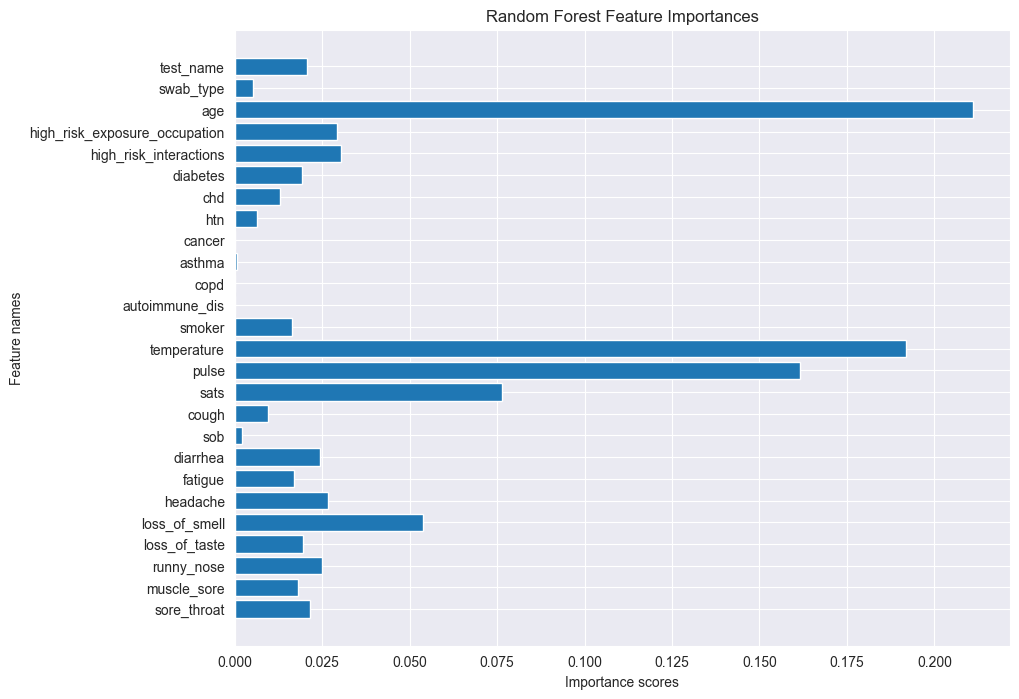

In [34]:
import matplotlib.pyplot as plt
n_features = X.shape[1]
plt.figure(figsize=(10,8))
plt.barh(range(n_features), covid_randomnessclf.feature_importances_, align="center")
plt.yticks(range(n_features), X.columns)
plt.xlabel("Importance scores")
plt.ylabel("Feature names")
plt.title("Random Forest Feature Importances")
plt.gca().invert_yaxis()
plt.show()


### Using Gradient Boosted classifier

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
covid_gbc = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)

In [36]:
print(f"Training set accuracy: {covid_gbc.score(X_train, y_train)}")
print(f"Generalizability: {covid_gbc.score(X_test, y_test)}")

Training set accuracy: 0.9981718464351006
Generalizability: 0.9956140350877193


 representing feature importance in the model

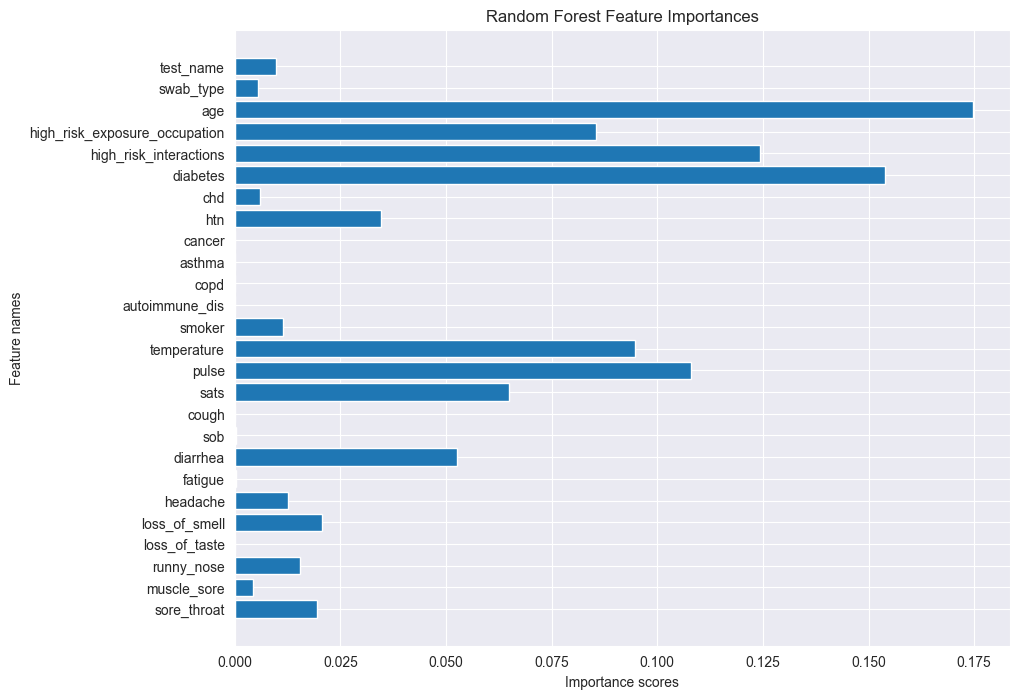

In [37]:
import matplotlib.pyplot as plt

n_features = X.shape[1]
plt.figure(figsize=(10,8))
plt.barh(range(n_features), covid_gbc.feature_importances_, align="center")
plt.yticks(range(n_features), X.columns)
plt.xlabel("Importance scores")
plt.ylabel("Feature names")
plt.title("Random Forest Feature Importances")
plt.gca().invert_yaxis()
plt.show()


## <span style="color:#F07900;">Model Evaluation and Comparative Insights</span>

Both the **Random Forest Classifier (RFC)** and the **Gradient Boosted Classifier (GBC)** achieved very high accuracy scores, indicating strong performance in predicting COVID-19 risk[cite: 828, 831].

| Metric | [cite_start]Random Forest Classifier (RFC) [cite: 828] | [cite_start]Gradient Boosted Classifier (GBC) [cite: 831] |
| :--- | :--- | :--- |
| **Training Set Accuracy** | 0.99872 | 0.99817 |
| **Generalizability (Test Set Accuracy)** | 0.99836 | 0.99561 |

---

### Comparative Analysis

* **Performance:** The **Random Forest Classifier** demonstrated slightly **better generalizability** (test set accuracy of 0.99836 vs. 0.99561) and a marginally higher training accuracy[cite: 828, 831].
* **Overfitting:** Both models show a minimal difference between training and test accuracy, suggesting neither is significantly overfitting to the training data. [cite_start]The RFC has a slightly smaller gap, which, combined with its higher test score, suggests it's the *most* robust model in this comparison[cite: 828, 831].
* **Conclusion:** Based purely on the given accuracy scores, the **Random Forest Classifier is the superior model** for this classification task[cite: 828, 831].

---

## Feature Importance Analysis and Practical Implications

Feature importance analysis helps determine which inputs have the greatest influence on the model's prediction[cite: 829, 830].


### Key Feature Importance (RFC & GBC)

The top features influencing the prediction vary slightly but generally highlight the critical diagnostic factors:

* **Random Forest Classifier (RFC)**[cite: 830, 831]:
    1.  **Age** (Highest importance)
    2.  **Temperature**
    3.  **Pulse**
    4.  **High-risk Interactions**
    5.  **Loss of Smell**
* **Gradient Boosted Classifier (GBC)**[cite: 831, 832]:
    1.  **Age** (Highest importance)
    2.  **High-risk Interactions**
    3.  **Diabetes**
    4.  **Temperature**
    5.  **Pulse**

---

### Practical Implications

The models' emphasis on certain features provides valuable real-world insight for resource allocation and medical screening:

1.  **Age as a Primary Risk Factor:** The fact that **age** is the most important feature in *both* models confirms its known significance as a critical factor in COVID-19 risk, likely reflecting its correlation with disease severity and general health status[cite: 831, 832].
2.  **Interaction Risk:** The high importance of **high-risk interactions** in the GBC and moderate importance in the RFC suggests that a person's level of exposure is a major predictor of contracting the virus[cite: 831, 832]. This validates public health advice on minimizing contact and confirms the benefit of contact tracing.
3.  **Symptom and Vitals Significance:** **Temperature**, **pulse**, and the key symptom **loss of smell** are ranked highly, indicating that simple vital signs and classic symptomatic data are crucial for an accurate diagnosis[cite: 831]. These metrics can be easily collected during a preliminary screening.
4.  **Comorbidity Impact:** The high importance of **diabetes** in the GBC shows that pre-existing conditions (comorbidities) are significant risk factors for predicting COVID-19 infection[cite: 831]. This suggests that clinical prediction models should heavily weight patient medical history.

# <span style="color: #b0f542">Task 2:  Car Price Prediction with a Decision Tree </span>

### **Objective**
Predict automobile prices using the provided auto dataset.

### **Requirements**
- Train a Decision Tree Regressor for this task.
- Evaluate performance using metrics such as RMSE, R^2.
- Interpret the tree structure and discuss how different features contribute


In [81]:
car_df = pd.read_csv("datasets/Auto Dataset.csv", encoding='latin1')

In [82]:
car_df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,3/26/2016 17:47,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,3/26/2016 0:00,0,79588,4/6/2016 6:45
1,4/4/2016 13:38,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,4/4/2016 0:00,0,71034,4/6/2016 14:45
2,3/26/2016 18:57,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,3/26/2016 0:00,0,35394,4/6/2016 20:15
3,3/12/2016 16:58,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,3/12/2016 0:00,0,33729,3/15/2016 3:16
4,4/1/2016 14:38,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,4/1/2016 0:00,0,39218,4/1/2016 14:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,3/27/2016 14:38,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,privat,Angebot,"$24,900",control,limousine,2011,automatik,239,q5,"100,000km",1,diesel,audi,nein,3/27/2016 0:00,0,82131,4/1/2016 13:47
49996,3/28/2016 10:50,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,privat,Angebot,"$1,980",control,cabrio,1996,manuell,75,astra,"150,000km",5,benzin,opel,nein,3/28/2016 0:00,0,44807,4/2/2016 14:18
49997,4/2/2016 14:44,Fiat_500_C_1.2_Dualogic_Lounge,privat,Angebot,"$13,200",test,cabrio,2014,automatik,69,500,"5,000km",11,benzin,fiat,nein,4/2/2016 0:00,0,73430,4/4/2016 11:47
49998,3/8/2016 19:25,Audi_A3_2.0_TDI_Sportback_Ambition,privat,Angebot,"$22,900",control,kombi,2013,manuell,150,a3,"40,000km",11,diesel,audi,nein,3/8/2016 0:00,0,35683,4/5/2016 16:45


### Removing unimportant features
ie date crawled, seller, offer type
reasons:
date_crawled → Unimportant in the final price of the car
seller, nrOfPictures and offer type → Lack of variability of data

In [83]:
car_df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [84]:
car_df = car_df.drop(['dateCrawled', 'seller', 'offerType', 'nrOfPictures'], axis=1)

In [85]:
car_df.tail()

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
49995,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,"$24,900",control,limousine,2011,automatik,239,q5,"100,000km",1,diesel,audi,nein,3/27/2016 0:00,82131,4/1/2016 13:47
49996,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,"$1,980",control,cabrio,1996,manuell,75,astra,"150,000km",5,benzin,opel,nein,3/28/2016 0:00,44807,4/2/2016 14:18
49997,Fiat_500_C_1.2_Dualogic_Lounge,"$13,200",test,cabrio,2014,automatik,69,500,"5,000km",11,benzin,fiat,nein,4/2/2016 0:00,73430,4/4/2016 11:47
49998,Audi_A3_2.0_TDI_Sportback_Ambition,"$22,900",control,kombi,2013,manuell,150,a3,"40,000km",11,diesel,audi,nein,3/8/2016 0:00,35683,4/5/2016 16:45
49999,Opel_Vectra_1.6_16V,"$1,250",control,limousine,1996,manuell,101,vectra,"150,000km",1,benzin,opel,nein,3/13/2016 0:00,45897,4/6/2016 21:18


### Handling missing datapoints

vehicle_type → Missing values are assigned "unspecified"

In [86]:
car_df['vehicleType'] = car_df['vehicleType'].fillna("unspecified")

In [87]:
car_df

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,Peugeot_807_160_NAVTECH_ON_BOARD,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,3/26/2016 0:00,79588,4/6/2016 6:45
1,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,4/4/2016 0:00,71034,4/6/2016 14:45
2,Volkswagen_Golf_1.6_United,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,3/26/2016 0:00,35394,4/6/2016 20:15
3,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,3/12/2016 0:00,33729,3/15/2016 3:16
4,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,4/1/2016 0:00,39218,4/1/2016 14:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,"$24,900",control,limousine,2011,automatik,239,q5,"100,000km",1,diesel,audi,nein,3/27/2016 0:00,82131,4/1/2016 13:47
49996,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,"$1,980",control,cabrio,1996,manuell,75,astra,"150,000km",5,benzin,opel,nein,3/28/2016 0:00,44807,4/2/2016 14:18
49997,Fiat_500_C_1.2_Dualogic_Lounge,"$13,200",test,cabrio,2014,automatik,69,500,"5,000km",11,benzin,fiat,nein,4/2/2016 0:00,73430,4/4/2016 11:47
49998,Audi_A3_2.0_TDI_Sportback_Ambition,"$22,900",control,kombi,2013,manuell,150,a3,"40,000km",11,diesel,audi,nein,3/8/2016 0:00,35683,4/5/2016 16:45


gearbox --> missing values assigned "unknown"

In [88]:
car_df['gearbox'] = car_df['gearbox'].fillna("unknown")

In [89]:
car_df

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,Peugeot_807_160_NAVTECH_ON_BOARD,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,3/26/2016 0:00,79588,4/6/2016 6:45
1,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,4/4/2016 0:00,71034,4/6/2016 14:45
2,Volkswagen_Golf_1.6_United,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,3/26/2016 0:00,35394,4/6/2016 20:15
3,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,3/12/2016 0:00,33729,3/15/2016 3:16
4,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,4/1/2016 0:00,39218,4/1/2016 14:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,"$24,900",control,limousine,2011,automatik,239,q5,"100,000km",1,diesel,audi,nein,3/27/2016 0:00,82131,4/1/2016 13:47
49996,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,"$1,980",control,cabrio,1996,manuell,75,astra,"150,000km",5,benzin,opel,nein,3/28/2016 0:00,44807,4/2/2016 14:18
49997,Fiat_500_C_1.2_Dualogic_Lounge,"$13,200",test,cabrio,2014,automatik,69,500,"5,000km",11,benzin,fiat,nein,4/2/2016 0:00,73430,4/4/2016 11:47
49998,Audi_A3_2.0_TDI_Sportback_Ambition,"$22,900",control,kombi,2013,manuell,150,a3,"40,000km",11,diesel,audi,nein,3/8/2016 0:00,35683,4/5/2016 16:45


model → missing values assigned "unknown_model"

In [90]:
car_df['model'] = car_df['model'].fillna("unknown")

fuelType, notRepairedDamage --> missing values assigned unknown

In [91]:
car_df['fuelType'] = car_df['fuelType'].fillna("unknown")
car_df['notRepairedDamage'] = car_df['notRepairedDamage'].fillna("unknown")
car_df

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,Peugeot_807_160_NAVTECH_ON_BOARD,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,3/26/2016 0:00,79588,4/6/2016 6:45
1,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,4/4/2016 0:00,71034,4/6/2016 14:45
2,Volkswagen_Golf_1.6_United,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,3/26/2016 0:00,35394,4/6/2016 20:15
3,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,3/12/2016 0:00,33729,3/15/2016 3:16
4,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,4/1/2016 0:00,39218,4/1/2016 14:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,"$24,900",control,limousine,2011,automatik,239,q5,"100,000km",1,diesel,audi,nein,3/27/2016 0:00,82131,4/1/2016 13:47
49996,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,"$1,980",control,cabrio,1996,manuell,75,astra,"150,000km",5,benzin,opel,nein,3/28/2016 0:00,44807,4/2/2016 14:18
49997,Fiat_500_C_1.2_Dualogic_Lounge,"$13,200",test,cabrio,2014,automatik,69,500,"5,000km",11,benzin,fiat,nein,4/2/2016 0:00,73430,4/4/2016 11:47
49998,Audi_A3_2.0_TDI_Sportback_Ambition,"$22,900",control,kombi,2013,manuell,150,a3,"40,000km",11,diesel,audi,nein,3/8/2016 0:00,35683,4/5/2016 16:45


### feature encoding

name column

In [92]:
car_df['name'] = encoder.fit_transform(car_df['name'])
car_df['name'].head(5)

0    24768
1     6118
2    34544
3    29244
4    11114
Name: name, dtype: int64

encoding the columns: abtest, vehicleType, gearbox, model, fuelType

In [93]:
car_df['abtest'] = encoder.fit_transform(car_df['abtest'])
car_df['vehicleType'] = encoder.fit_transform(car_df['vehicleType'])
car_df['gearbox'] = encoder.fit_transform(car_df['gearbox'])
car_df['model'] = encoder.fit_transform(car_df['model'])
car_df['fuelType'] = encoder.fit_transform(car_df['fuelType'])
car_df

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,24768,"$5,000",0,1,2004,1,158,40,"150,000km",3,6,peugeot,nein,3/26/2016 0:00,79588,4/6/2016 6:45
1,6118,"$8,500",0,6,1997,0,286,19,"150,000km",6,1,bmw,nein,4/4/2016 0:00,71034,4/6/2016 14:45
2,34544,"$8,990",1,6,2009,1,102,116,"70,000km",7,1,volkswagen,nein,3/26/2016 0:00,35394,4/6/2016 20:15
3,29244,"$4,350",0,4,2007,0,71,106,"70,000km",6,1,smart,nein,3/12/2016 0:00,33729,3/15/2016 3:16
4,11114,"$1,350",1,5,2003,1,0,103,"150,000km",7,1,ford,nein,4/1/2016 0:00,39218,4/1/2016 14:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,3495,"$24,900",0,6,2011,0,239,176,"100,000km",1,3,audi,nein,3/27/2016 0:00,82131,4/1/2016 13:47
49996,21073,"$1,980",0,2,1996,1,75,43,"150,000km",5,1,opel,nein,3/28/2016 0:00,44807,4/2/2016 14:18
49997,9603,"$13,200",1,2,2014,0,69,13,"5,000km",11,1,fiat,nein,4/2/2016 0:00,73430,4/4/2016 11:47
49998,1877,"$22,900",0,5,2013,1,150,28,"40,000km",11,3,audi,nein,3/8/2016 0:00,35683,4/5/2016 16:45


encoding notRepairedDamages and brand

In [94]:
car_df['notRepairedDamage'] = encoder.fit_transform(car_df['notRepairedDamage'])
car_df['brand'] = encoder.fit_transform(car_df['brand'])
car_df

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,24768,"$5,000",0,1,2004,1,158,40,"150,000km",3,6,25,1,3/26/2016 0:00,79588,4/6/2016 6:45
1,6118,"$8,500",0,6,1997,0,286,19,"150,000km",6,1,2,1,4/4/2016 0:00,71034,4/6/2016 14:45
2,34544,"$8,990",1,6,2009,1,102,116,"70,000km",7,1,38,1,3/26/2016 0:00,35394,4/6/2016 20:15
3,29244,"$4,350",0,4,2007,0,71,106,"70,000km",6,1,32,1,3/12/2016 0:00,33729,3/15/2016 3:16
4,11114,"$1,350",1,5,2003,1,0,103,"150,000km",7,1,10,1,4/1/2016 0:00,39218,4/1/2016 14:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,3495,"$24,900",0,6,2011,0,239,176,"100,000km",1,3,1,1,3/27/2016 0:00,82131,4/1/2016 13:47
49996,21073,"$1,980",0,2,1996,1,75,43,"150,000km",5,1,24,1,3/28/2016 0:00,44807,4/2/2016 14:18
49997,9603,"$13,200",1,2,2014,0,69,13,"5,000km",11,1,9,1,4/2/2016 0:00,73430,4/4/2016 11:47
49998,1877,"$22,900",0,5,2013,1,150,28,"40,000km",11,3,1,1,3/8/2016 0:00,35683,4/5/2016 16:45


converting price into integer values

In [95]:
car_df['price'] = car_df['price'].str.replace("$", "", regex=False).str.replace(",", "", regex=False).astype(int)

In [96]:
car_df['price']

0         5000
1         8500
2         8990
3         4350
4         1350
         ...  
49995    24900
49996     1980
49997    13200
49998    22900
49999     1250
Name: price, Length: 50000, dtype: int64

odometer values into integer values

In [97]:
car_df['odometer'] = car_df['odometer'].str.replace("km", "", regex=False).str.replace(",", "", regex=False).astype(int)

In [98]:
car_df["odometer"]

0        150000
1        150000
2         70000
3         70000
4        150000
          ...  
49995    100000
49996    150000
49997      5000
49998     40000
49999    150000
Name: odometer, Length: 50000, dtype: int64

In [99]:
car_df

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,24768,5000,0,1,2004,1,158,40,150000,3,6,25,1,3/26/2016 0:00,79588,4/6/2016 6:45
1,6118,8500,0,6,1997,0,286,19,150000,6,1,2,1,4/4/2016 0:00,71034,4/6/2016 14:45
2,34544,8990,1,6,2009,1,102,116,70000,7,1,38,1,3/26/2016 0:00,35394,4/6/2016 20:15
3,29244,4350,0,4,2007,0,71,106,70000,6,1,32,1,3/12/2016 0:00,33729,3/15/2016 3:16
4,11114,1350,1,5,2003,1,0,103,150000,7,1,10,1,4/1/2016 0:00,39218,4/1/2016 14:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,3495,24900,0,6,2011,0,239,176,100000,1,3,1,1,3/27/2016 0:00,82131,4/1/2016 13:47
49996,21073,1980,0,2,1996,1,75,43,150000,5,1,24,1,3/28/2016 0:00,44807,4/2/2016 14:18
49997,9603,13200,1,2,2014,0,69,13,5000,11,1,9,1,4/2/2016 0:00,73430,4/4/2016 11:47
49998,1877,22900,0,5,2013,1,150,28,40000,11,3,1,1,3/8/2016 0:00,35683,4/5/2016 16:45


working on the dateCreated lastSeen features (converting them to numeric date time features)

In [100]:
car_df['dateCreated'] = pd.to_datetime(car_df['dateCreated'])
car_df['lastSeen'] = pd.to_datetime(car_df['lastSeen'])

In [101]:
for col in ['dateCreated', 'lastSeen']:
    car_df[col + '_month'] = car_df[col].dt.month
    car_df[col + '_day'] = car_df[col].dt.day
    car_df[col + '_dayofweek'] = car_df[col].dt.dayofweek

In [102]:
car_df

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,...,notRepairedDamage,dateCreated,postalCode,lastSeen,dateCreated_month,dateCreated_day,dateCreated_dayofweek,lastSeen_month,lastSeen_day,lastSeen_dayofweek
0,24768,5000,0,1,2004,1,158,40,150000,3,...,1,2016-03-26,79588,2016-04-06 06:45:00,3,26,5,4,6,2
1,6118,8500,0,6,1997,0,286,19,150000,6,...,1,2016-04-04,71034,2016-04-06 14:45:00,4,4,0,4,6,2
2,34544,8990,1,6,2009,1,102,116,70000,7,...,1,2016-03-26,35394,2016-04-06 20:15:00,3,26,5,4,6,2
3,29244,4350,0,4,2007,0,71,106,70000,6,...,1,2016-03-12,33729,2016-03-15 03:16:00,3,12,5,3,15,1
4,11114,1350,1,5,2003,1,0,103,150000,7,...,1,2016-04-01,39218,2016-04-01 14:38:00,4,1,4,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,3495,24900,0,6,2011,0,239,176,100000,1,...,1,2016-03-27,82131,2016-04-01 13:47:00,3,27,6,4,1,4
49996,21073,1980,0,2,1996,1,75,43,150000,5,...,1,2016-03-28,44807,2016-04-02 14:18:00,3,28,0,4,2,5
49997,9603,13200,1,2,2014,0,69,13,5000,11,...,1,2016-04-02,73430,2016-04-04 11:47:00,4,2,5,4,4,0
49998,1877,22900,0,5,2013,1,150,28,40000,11,...,1,2016-03-08,35683,2016-04-05 16:45:00,3,8,1,4,5,1


In [103]:
car_df = car_df.drop(['dateCreated', 'lastSeen'], axis=1)

In [104]:
car_df

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode,dateCreated_month,dateCreated_day,dateCreated_dayofweek,lastSeen_month,lastSeen_day,lastSeen_dayofweek
0,24768,5000,0,1,2004,1,158,40,150000,3,6,25,1,79588,3,26,5,4,6,2
1,6118,8500,0,6,1997,0,286,19,150000,6,1,2,1,71034,4,4,0,4,6,2
2,34544,8990,1,6,2009,1,102,116,70000,7,1,38,1,35394,3,26,5,4,6,2
3,29244,4350,0,4,2007,0,71,106,70000,6,1,32,1,33729,3,12,5,3,15,1
4,11114,1350,1,5,2003,1,0,103,150000,7,1,10,1,39218,4,1,4,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,3495,24900,0,6,2011,0,239,176,100000,1,3,1,1,82131,3,27,6,4,1,4
49996,21073,1980,0,2,1996,1,75,43,150000,5,1,24,1,44807,3,28,0,4,2,5
49997,9603,13200,1,2,2014,0,69,13,5000,11,1,9,1,73430,4,2,5,4,4,0
49998,1877,22900,0,5,2013,1,150,28,40000,11,3,1,1,35683,3,8,1,4,5,1
